In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [4]:
#Cargamos el dataset y mostramos las 5 primeras filas
data = pd.read_csv("C:/UNAD/winequality-red.csv")
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.shape

(1599, 12)

In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([  8.,  27.,  90., 250., 485., 450., 185.,  74.,  19.,  11.]),
 array([0.99007 , 0.991432, 0.992794, 0.994156, 0.995518, 0.99688 ,
        0.998242, 0.999604, 1.000966, 1.002328, 1.00369 ]),
 <BarContainer object of 10 artists>)

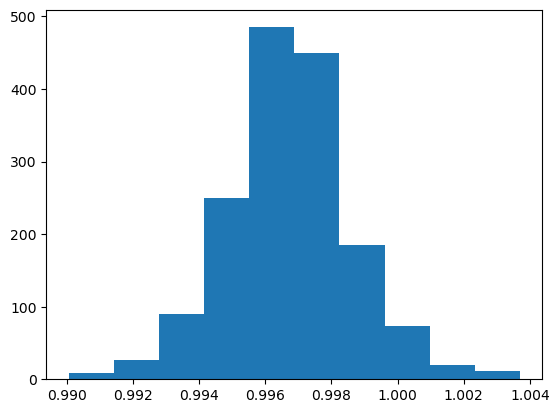

In [87]:
plt.hist(data.density)

<Axes: xlabel='citric acid', ylabel='residual sugar'>

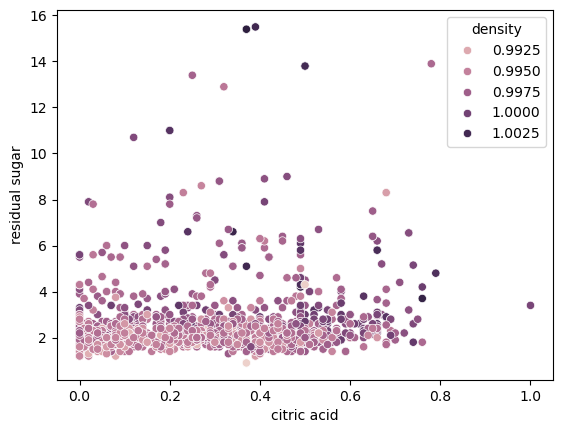

In [88]:
sns.scatterplot(x = "citric acid", y = "residual sugar", hue = "density", data = data)

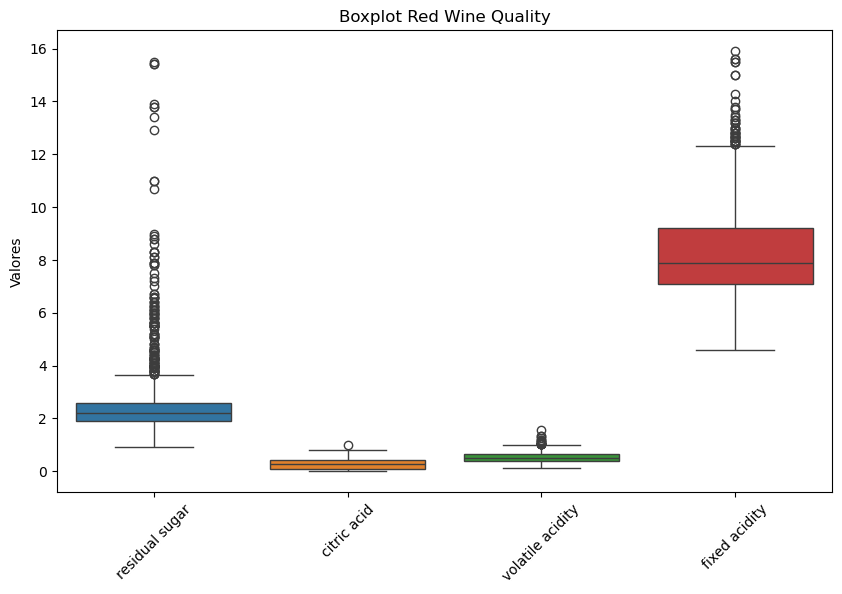

In [89]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['residual sugar', 'citric acid', 'volatile acidity', 'fixed acidity']])
plt.xticks(rotation=45)
plt.title('Boxplot Red Wine Quality')
plt.ylabel('Valores')
plt.show()

In [90]:
predictors_col = ['residual sugar', 'citric acid', 'volatile acidity', 'fixed acidity']
target_col = ['density']

In [91]:
predictors = data[predictors_col]
target = data[target_col]

In [92]:
predictors

,residual sugar,citric acid,volatile acidity,fixed acidity
0,1.9,0.00,0.700,7.4
1,2.6,0.00,0.880,7.8
2,2.3,0.04,0.760,7.8
3,1.9,0.56,0.280,11.2
4,1.9,0.00,0.700,7.4
...,...,...,...,...
1594,2.0,0.08,0.600,6.2
1595,2.2,0.10,0.550,5.9
1596,2.3,0.13,0.510,6.3
1597,2.0,0.12,0.645,5.9


In [93]:
target

,density
0,0.99780
1,0.99680
2,0.99700
3,0.99800
4,0.99780
...,...
1594,0.99490
1595,0.99512
1596,0.99574
1597,0.99547


In [94]:
corr = predictors.corr()
corr

,residual sugar,citric acid,volatile acidity,fixed acidity
residual sugar,1.000000,0.143577,0.001918,0.114777
citric acid,0.143577,1.000000,-0.552496,0.671703
volatile acidity,0.001918,-0.552496,1.000000,-0.256131
fixed acidity,0.114777,0.671703,-0.256131,1.000000


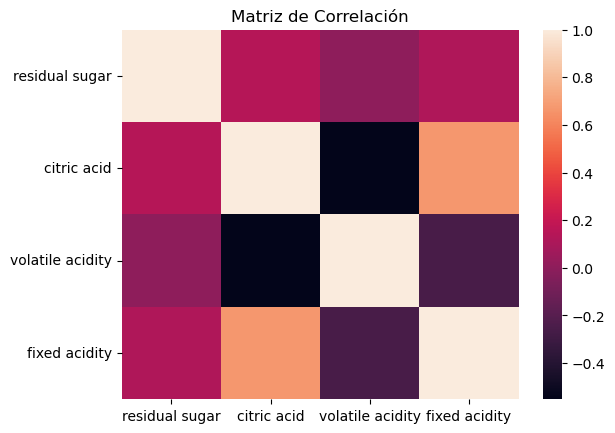

In [95]:
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

In [113]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [115]:
tree = DecisionTreeClassifier()

In [ ]:
arbol = tree.fit(X_train, y_train)

[Text(0.5008890213526555, 0.9833333333333333, 'x[1] <= 0.548\ngini = 0.646\nsamples = 1279\nvalue = [9.0, 45.0, 535.0, 514.0, 164.0, 12.0]'),
 Text(0.18617876838235295, 0.95, 'x[1] <= 0.317\ngini = 0.649\nsamples = 699\nvalue = [1, 14, 210, 331, 133, 10]'),
 Text(0.3435338948675042, 0.9666666666666666, 'True  '),
 Text(0.037314253055482284, 0.9166666666666666, 'x[3] <= 1.65\ngini = 0.597\nsamples = 145\nvalue = [0, 1, 15, 73, 54, 2]'),
 Text(0.005627363052844456, 0.8833333333333333, 'x[2] <= 0.23\ngini = 0.34\nsamples = 20\nvalue = [0, 0, 2, 16, 2, 0]'),
 Text(0.002813681526422228, 0.85, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1, 0]'),
 Text(0.008441044579266685, 0.85, 'x[3] <= 1.55\ngini = 0.277\nsamples = 19\nvalue = [0, 0, 2, 16, 1, 0]'),
 Text(0.005627363052844456, 0.8166666666666667, 'gini = 0.0\nsamples = 10\nvalue = [0, 0, 0, 10, 0, 0]'),
 Text(0.011254726105688912, 0.8166666666666667, 'x[2] <= 0.38\ngini = 0.494\nsamples = 9\nvalue = [0, 0, 2, 6, 1, 0]'),
 Text(0.0084410

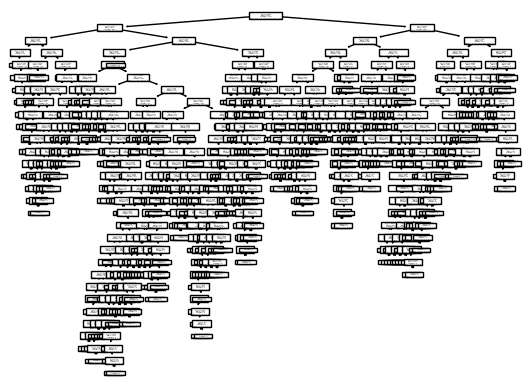

In [112]:
plot_tree(arbol)

In [ ]:
predicciones = arbol.predict(X_test)

In [72]:
predicciones

array([5, 6, 5, 5, 6, 5, 5, 6, 6, 6, 6, 6, 5, 6, 7, 7, 6, 7, 6, 7, 5, 8,
       7, 5, 5, 6, 6, 6, 6, 6, 7, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 7, 6, 6,
       5, 7, 6, 7, 6, 6, 6, 6, 5, 5, 7, 4, 5, 7, 5, 5, 5, 5, 5, 7, 7, 7,
       7, 6, 5, 6, 6, 6, 6, 6, 4, 6, 6, 5, 5, 4, 7, 5, 5, 5, 6, 6, 6, 5,
       6, 5, 4, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 7, 5, 5, 5, 5, 5, 5, 5, 7,
       6, 6, 7, 5, 6, 5, 7, 7, 5, 6, 5, 5, 5, 6, 4, 6, 5, 5, 6, 7, 6, 5,
       5, 7, 6, 5, 7, 5, 6, 6, 5, 5, 3, 6, 5, 5, 6, 5, 7, 6, 5, 6, 6, 5,
       5, 5, 6, 6, 6, 5, 5, 6, 6, 6, 7, 6, 5, 6, 6, 5, 5, 5, 5, 6, 7, 5,
       5, 7, 5, 5, 6, 6, 6, 5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 5, 6, 5, 7, 7,
       4, 4, 6, 6, 6, 6, 4, 6, 6, 5, 5, 5, 5, 5, 4, 6, 6, 5, 6, 6, 6, 6,
       6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 5, 6, 5, 6, 6,
       5, 6, 5, 6, 7, 5, 5, 5, 6, 5, 5, 6, 6, 5, 7, 6, 5, 5, 6, 6, 7, 5,
       5, 6, 6, 7, 5, 5, 6, 5, 5, 5, 4, 4, 6, 5, 5, 5, 5, 7, 5, 5, 7, 5,
       5, 7, 5, 5, 6, 6, 6, 6, 5, 7, 6, 5, 5, 5, 5,

In [73]:
# Examinamos la matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,3,4,5,6,7,8
Actual,,,,,,
0.99064,0,0,0,0,1,0
0.99084,0,0,0,1,0,0
0.99157,0,0,0,0,1,0
0.99162,0,0,0,1,0,0
0.99210,0,0,0,0,1,0
...,...,...,...,...,...,...
1.00060,0,0,0,2,0,0
1.00080,0,0,0,1,0,0
1.00100,0,0,0,1,0,0


In [40]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.5875

In [41]:
precision = precision_score(y_test, predicciones, average='weighted')
precision

0.5898088254338254

In [42]:
recall = recall_score(y_test, predicciones, average='weighted')
recall

0.5875

In [44]:
f1 = f1_score(y_test, predicciones, average='weighted')
f1

0.5878054704782629